### pangaeapy

This module allows to download and analyse metadata as well as data from tabular PANGAEA (https://www.pangaea.de) datasets.

https://github.com/pangaea-data-publisher/pangaeapy

In [1]:
import pangaeapy.src.pandataset as pandataset

In [2]:
# You want data from https://doi.pangaea.de/10.1594/PANGAEA.912222

ds= pandataset.PanDataSet(912222)
print(ds.title)
print(ds.year)
for a in ds.authors: 
    print(a.fullname)

Seawater carbonate chemistry and coral calcification
2020
Gómez Batista, Miguel
Metian, Marc
Oberhänsli, F
Pouil, Simon
Tambutté, Eric
Gattuso, Jean-Pierre
Hernández, Carlos M Alonso
Gazeau, Frédéric


/home/brock/.local/lib/python3.8/site-packages/pangaeapy/src/pandataset.py:407: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  self.setData(addQC=addQC)


In [3]:
ds.data.head()

,Type,Species,Reg spec no,URL ref,Exp,Type_2,Type_3,Treat,ID,Date/time start,...,[HCO3]-_2,[HCO3]- std dev_2,[CO3]2-_2,[CO3]2- std dev_2,DIC_2,DIC std dev_2,Omega Arg_2,Omega Arg std dev_2,Omega Cal_2,Omega Cal std dev_2
0,laboratory,Stylophora pistillata (coral),206982,http://www.marinespecies.org/aphia.php?p=taxde...,IC-LIGHT-45Ca,Exp,45Ca,Ambient pH / Light,1,2017-08-23T08:15,...,1634.05,14.59,224.22,6.81,1868.31,8.30,3.36,0.19,5.08,0.28
1,laboratory,Stylophora pistillata (coral),206982,http://www.marinespecies.org/aphia.php?p=taxde...,IC-LIGHT-45Ca,Exp,45Ca,Ambient pH / Light,2,2017-08-23T08:15,...,1613.23,14.42,221.79,6.74,1844.93,8.19,3.32,0.18,5.02,0.28
2,laboratory,Stylophora pistillata (coral),206982,http://www.marinespecies.org/aphia.php?p=taxde...,IC-LIGHT-45Ca,Exp,45Ca,Ambient pH / Light,3,2017-08-23T08:15,...,1587.60,15.49,244.90,7.24,1841.19,8.76,3.66,0.20,5.54,0.30
3,laboratory,Stylophora pistillata (coral),206982,http://www.marinespecies.org/aphia.php?p=taxde...,IC-LIGHT-45Ca,Exp,45Ca,Ambient pH / Light,4,2017-08-23T08:15,...,1647.49,13.91,210.56,6.50,1868.91,7.90,3.16,0.18,4.77,0.26
4,laboratory,Stylophora pistillata (coral),206982,http://www.marinespecies.org/aphia.php?p=taxde...,IC-LIGHT-45Ca,Exp,45Ca,Ambient pH / Light,5,2017-08-23T08:15,...,1584.54,14.16,217.42,6.60,1811.70,8.05,3.26,0.18,4.92,0.27


In [4]:
ds.data.columns

Index(['Type', 'Species', 'Reg spec no', 'URL ref', 'Exp', 'Type_2', 'Type_3',
       'Treat', 'ID', 'Date/time start', 'Date/time end', 'Inc dur', 'Size',
       'Mass', 'Mass_2', 'Dry m', 'Mass_3', 'Mass_4', 'Mass_5', 'Mass_6',
       'Sal', 'Sal_2', 'pH', 'pH_2', 'AT', 'AT std dev', 'AT_2',
       'AT std dev_2', 'Ca2+', 'Ca2+ std dev', 'Ca2+_2', 'Ca2+ std dev_2',
       '45Ca', '45Ca_2', '45Ca_3', '45Ca std dev', 'δ13C', 'δ13C_2',
       'δ13C std dev', 'δ13C_3', 'δ13C_4', 'Calc rate CaCO3',
       'Calc rate std e', 'Calc rate CaCO3_2', 'Calc rate std e_2',
       'Calc rate CaCO3_3', 'Calc rate std e_3', 'Calc rate CaCO3_4',
       'Calc rate std e_4', 'Temp', 'Temp std dev', 'CSC flag', 'CO2',
       'CO2 std dev', 'fCO2water_SST_wet', 'fCO2 std dev', 'pCO2water_SST_wet',
       'pCO2 std dev', '[HCO3]-', '[HCO3]- std dev', '[CO3]2-',
       '[CO3]2- std dev', 'DIC', 'DIC std dev', 'Omega Arg',
       'Omega Arg std dev', 'Omega Cal', 'Omega Cal std dev', 'CO2_2',
       'CO2 st

<AxesSubplot:xlabel='Date/time start'>

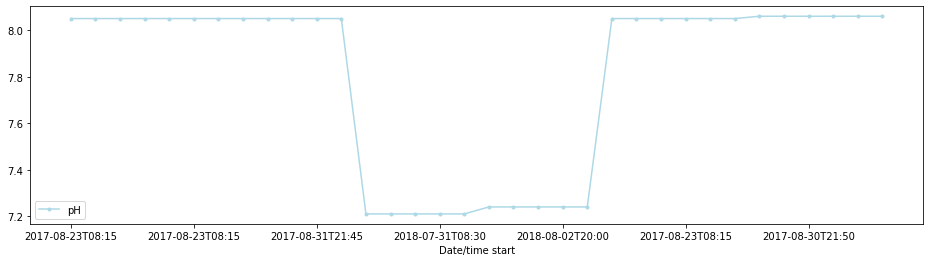

In [5]:
ds.data.plot(x='Date/time start', y='pH', c='lightblue', marker='.', figsize=[16,4])

In [6]:
ds.data['CSC flag'].unique()

array([8])

In [7]:
import json
import urllib
import pandas as pd

In [8]:
# Extract all articles (citation_date and keyword included)

url = 'http://ws.pangaea.de/es/dataportal-oa-icc/pansimple/_search?size=2000&_source_include=citation_date,keyword'

jsonurl = urllib.request.urlopen(url)
jsonread = json.loads(jsonurl.read())
jsonurl.close()

In [9]:
# Transform the resulting json to a pandas dataframe

df = pd.DataFrame.from_dict(jsonread['hits']['hits'])
df

,_index,_type,_id,_score,_source
0,portals_v2,pansimple,PANGAEA.884674,1.0,"{'citation_date': '2018-01-09', 'keyword': ['A..."
1,portals_v2,pansimple,PANGAEA.891075,1.0,"{'citation_date': '2018-06-15', 'keyword': ['A..."
2,portals_v2,pansimple,PANGAEA.885874,1.0,"{'citation_date': '2018-02-02', 'keyword': ['B..."
3,portals_v2,pansimple,PANGAEA.872024,1.0,"{'citation_date': '2016-02-14', 'keyword': ['A..."
4,portals_v2,pansimple,PANGAEA.912589,1.0,"{'citation_date': '2019-02-26', 'keyword': ['A..."
...,...,...,...,...,...
1240,portals_v2,pansimple,PANGAEA.937391,1.0,"{'citation_date': '2021-10-15', 'keyword': ['A..."
1241,portals_v2,pansimple,PANGAEA.933051,1.0,"{'citation_date': '2021-06-25', 'keyword': ['A..."
1242,portals_v2,pansimple,PANGAEA.884090,1.0,"{'citation_date': '2018-12-14', 'keyword': ['A..."
1243,portals_v2,pansimple,PANGAEA.830713,1.0,"{'citation_date': '2013-03-19', 'keyword': ['A..."


In [10]:
# Reorganize _source dictionnary as columns

# Sometimes only {} and not {'keyword: [...]'}
df['citation_date'] = df['_source'].apply(
    lambda x: eval(str(x))['citation_date'] if 'citation_date' in eval(str(x)).keys() else None)
df['keyword'] = df['_source'].apply(
    lambda x: eval(str(x))['keyword'] if 'keyword' in eval(str(x)).keys() else None)

# Force to be a list (not the case when only 1 keyword)
df['keyword'] = df['keyword'].apply(lambda x: [x] if type(x) is not list else x)

In [11]:
# Drop unused columns

df.drop(['_score','_type','_index','_source'], axis=1, inplace=True)
df.sort_values(by=['citation_date'])

,_id,citation_date,keyword
271,PANGAEA.755149,1967-12-13,"[Calcification/Dissolution, Coast and continen..."
465,PANGAEA.717620,1992-06-05,"[Benthos, Calcification/Dissolution, Coast and..."
463,PANGAEA.717621,1994-06-05,"[Benthos, Calcification/Dissolution, Coast and..."
904,PANGAEA.721926,1995-03-01,"[Benthos, Calcification/Dissolution, Coast and..."
11,PANGAEA.716842,1995-05-30,"[Benthos, Calcification/Dissolution, Coast and..."
...,...,...,...
485,PANGAEA.936683,2021-10-05,"[Animalia, Antarctic, Benthic animals, Benthos..."
1078,PANGAEA.937216,2021-10-12,"[Benthos, Calcification/Dissolution, Coast and..."
1240,PANGAEA.937391,2021-10-15,"[Animalia, Benthic animals, Benthos, Bottles o..."
1244,PANGAEA.937477,2021-10-20,"[Animalia, Benthic animals, Benthos, Calcifica..."


In [137]:
#%%capture

d1 = pd.DataFrame()
#for Pangaea_DOI in df['_id'][0:0]:
for Pangaea_DOI in df['_id']:
    print("----------------------------------------------")
    print(Pangaea_DOI)    
    try:
        Pangaea_DOI_id = int(Pangaea_DOI.split('.')[1])
        ds = pandataset.PanDataSet(Pangaea_DOI_id)     
        if ds.isParent:
            print("  ", ds.children)
            for child in ds.children:
                Pangaea_DOI_child = child.split('/')[1]
                a = df[df['_id'] == Pangaea_DOI_child]
                print("    ", Pangaea_DOI_child)
                if len(a) == 0:         
                    Pangaea_DOI_child_id = int(Pangaea_DOI_child.split('.')[1])
                    dsChild = pandataset.PanDataSet(Pangaea_DOI_child_id)
                    try:
                        CSC_flag = list(dsChild.data['CSC flag'].unique())
                        print("     ---> CSC flag: ", CSC_flag)
                        d1 = d1.append({'Pangaea_DOI': Pangaea_DOI_child, 'CSC flag': CSC_flag}, ignore_index=True)
                    except:
                        print("     ---> CSC flag: Not available")
                else:
                    print("     ---> Already considered", )
        else:
            CSC_flag = list(ds.data['CSC flag'].unique())
            print("     ---> CSC flag: ", CSC_flag)
            d1 = d1.append({'Pangaea_DOI': Pangaea_DOI, 'CSC flag': CSC_flag}, ignore_index=True)
    except:
        print('====> /!\ ERROR')
    

----------------------------------------------
PANGAEA.884674
PROBLEM: Data set is of type parent, please select one of its child datasets
   ['doi:10.1594/PANGAEA.884671', 'doi:10.1594/PANGAEA.884670', 'doi:10.1594/PANGAEA.884673']
     PANGAEA.884671
     ---> Already considered
     PANGAEA.884670
     ---> Already considered
     PANGAEA.884673
     ---> Already considered
----------------------------------------------
PANGAEA.891075
PROBLEM: Data set is of type parent, please select one of its child datasets
   ['doi:10.1594/PANGAEA.891026', 'doi:10.1594/PANGAEA.891065']
     PANGAEA.891026
     ---> Already considered
     PANGAEA.891065
     ---> Already considered
----------------------------------------------
PANGAEA.885874
PROBLEM: Data set is of type parent, please select one of its child datasets
   ['doi:10.1594/PANGAEA.885869', 'doi:10.1594/PANGAEA.885868', 'doi:10.1594/PANGAEA.885872', 'doi:10.1594/PANGAEA.885871', 'doi:10.1594/PANGAEA.885807', 'doi:10.1594/PANGAEA.88587

/home/brock/.local/lib/python3.8/site-packages/pangaeapy/src/pandataset.py:407: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  self.setData(addQC=addQC)


     ---> CSC flag:  [8]
     PANGAEA.885868
     ---> CSC flag:  [8]
     PANGAEA.885872
     ---> CSC flag:  [8]
     PANGAEA.885871
     ---> CSC flag:  [8]
     PANGAEA.885807
     ---> CSC flag:  [8]
     PANGAEA.885873
     ---> CSC flag:  [8]
     PANGAEA.885870
     ---> CSC flag:  [8]
----------------------------------------------
PANGAEA.872024
PROBLEM: Data set is of type parent, please select one of its child datasets
   ['doi:10.1594/PANGAEA.872023', 'doi:10.1594/PANGAEA.872022']
     PANGAEA.872023
     ---> CSC flag:  [28]
     PANGAEA.872022
     ---> CSC flag: Not available
----------------------------------------------
PANGAEA.912589
PROBLEM: Data set is of type parent, please select one of its child datasets
   ['doi:10.1594/PANGAEA.912526', 'doi:10.1594/PANGAEA.912578', 'doi:10.1594/PANGAEA.912575']
     PANGAEA.912526
     ---> CSC flag: Not available
     PANGAEA.912578
     ---> CSC flag:  [27.0, nan]
     PANGAEA.912575
     ---> CSC flag:  [27]
----------------

/home/brock/.local/lib/python3.8/site-packages/pangaeapy/src/pandataset.py:407: DtypeWarning: Columns (35,37,40,41,45,46,48,50,53,56) have mixed types.Specify dtype option on import or set low_memory=False.
  self.setData(addQC=addQC)


     ---> CSC flag:  [nan, 15.0]
----------------------------------------------
PANGAEA.872533
     ---> CSC flag:  [27.0, nan]
----------------------------------------------
PANGAEA.847229
     ---> CSC flag:  [15]
----------------------------------------------
PANGAEA.835117
     ---> CSC flag:  [nan, 15.0]
----------------------------------------------
PANGAEA.834159
     ---> CSC flag:  [15]
----------------------------------------------
PANGAEA.842185
     ---> CSC flag:  [15.0, nan]
----------------------------------------------
PANGAEA.836963
     ---> CSC flag:  [8]
----------------------------------------------
PANGAEA.872397
     ---> CSC flag:  [15]
----------------------------------------------
PANGAEA.872400
     ---> CSC flag:  [8]
----------------------------------------------
PANGAEA.936683
     ---> CSC flag:  [8.0, nan]
----------------------------------------------
PANGAEA.868943
     ---> CSC flag:  [8]
----------------------------------------------
PANGAEA.737473
P

/home/brock/.local/lib/python3.8/site-packages/pangaeapy/src/pandataset.py:407: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  self.setData(addQC=addQC)


     ---> CSC flag:  [15]
----------------------------------------------
PANGAEA.761765
PROBLEM: Data set is of type parent, please select one of its child datasets
   ['doi:10.1594/PANGAEA.761761', 'doi:10.1594/PANGAEA.761764']
     PANGAEA.761761
     ---> CSC flag:  [26]
     PANGAEA.761764
     ---> CSC flag: Not available
----------------------------------------------
PANGAEA.830128
     ---> CSC flag:  [21.0, nan]
----------------------------------------------
PANGAEA.833670
     ---> CSC flag:  [15]
----------------------------------------------
PANGAEA.831423
     ---> CSC flag:  [15]
----------------------------------------------
PANGAEA.929951
     ---> CSC flag:  [9]
----------------------------------------------
PANGAEA.752267
     ---> CSC flag:  [26]
----------------------------------------------
PANGAEA.930756
     ---> CSC flag:  [8]
----------------------------------------------
PANGAEA.722837
     ---> CSC flag:  [24]
----------------------------------------------
PAN

In [138]:
d1

,Pangaea_DOI,CSC flag
0,PANGAEA.885869,[8]
1,PANGAEA.885868,[8]
2,PANGAEA.885872,[8]
3,PANGAEA.885871,[8]
4,PANGAEA.885807,[8]
...,...,...
1271,PANGAEA.937391,[9]
1272,PANGAEA.933051,[15]
1273,PANGAEA.884090,"[nan, 15.0]"
1274,PANGAEA.830713,[8]


In [140]:
ds = pandataset.PanDataSet(716842)

In [143]:
ds.data.columns

Index(['Date', 'Site', 'Depth water', 'Exp treat', 'Sal', 'Temp', 'PAR', 'pH',
       'pH_2', 'AT', 'AT_2', 'DIC', 'CO2', '[CO3]2-', '[HCO3]-',
       'pCO2water_SST_wet', 'fCO2w', 'Omega Arg', 'Omega Cal',
       'Calc rate CaCO3', 'Event', 'Latitude', 'Longitude'],
      dtype='object')

In [147]:
d1['len'] = d1['CSC flag'].apply(lambda x: len(x))
d1

,Pangaea_DOI,CSC flag,len
0,PANGAEA.885869,[8],1
1,PANGAEA.885868,[8],1
2,PANGAEA.885872,[8],1
3,PANGAEA.885871,[8],1
4,PANGAEA.885807,[8],1
...,...,...,...
1271,PANGAEA.937391,[9],1
1272,PANGAEA.933051,[15],1
1273,PANGAEA.884090,"[nan, 15.0]",2
1274,PANGAEA.830713,[8],1


In [148]:
d1[d1['len'] >= 1]

,Pangaea_DOI,CSC flag,len
0,PANGAEA.885869,[8],1
1,PANGAEA.885868,[8],1
2,PANGAEA.885872,[8],1
3,PANGAEA.885871,[8],1
4,PANGAEA.885807,[8],1
...,...,...,...
1271,PANGAEA.937391,[9],1
1272,PANGAEA.933051,[15],1
1273,PANGAEA.884090,"[nan, 15.0]",2
1274,PANGAEA.830713,[8],1


### Save file for later use

In [27]:
import csv
import numpy as np

In [150]:
d1['CSC flag'] = d1['CSC flag'].apply(lambda a: [x for x in a if np.isnan(x) == False])

In [151]:
d1['len'] = d1['CSC flag'].apply(lambda x: len(x))

In [152]:
d1

,Pangaea_DOI,CSC flag,len
0,PANGAEA.885869,[8],1
1,PANGAEA.885868,[8],1
2,PANGAEA.885872,[8],1
3,PANGAEA.885871,[8],1
4,PANGAEA.885807,[8],1
...,...,...,...
1271,PANGAEA.937391,[9],1
1272,PANGAEA.933051,[15],1
1273,PANGAEA.884090,[15.0],1
1274,PANGAEA.830713,[8],1


In [153]:
d1.to_csv("flags.csv", index=False, quoting=csv.QUOTE_ALL)

In [154]:
import numpy as np
from numpy import nan

In [155]:
d2 = pd.read_csv('flags.csv')

In [158]:
d2['CSC flag'] = d2['CSC flag'].apply(lambda x: eval(x))

In [159]:
d2[d2['len'] >=1 ]

,Pangaea_DOI,CSC flag,len
0,PANGAEA.885869,[8],1
1,PANGAEA.885868,[8],1
2,PANGAEA.885872,[8],1
3,PANGAEA.885871,[8],1
4,PANGAEA.885807,[8],1
...,...,...,...
1271,PANGAEA.937391,[9],1
1272,PANGAEA.933051,[15],1
1273,PANGAEA.884090,[15.0],1
1274,PANGAEA.830713,[8],1


In [160]:
d2[d2['CSC flag'].apply(lambda x: bool(set(x) & set([2,13,23])))]

,Pangaea_DOI,CSC flag,len
356,PANGAEA.718130,[13],1
978,PANGAEA.756651,[23],1
1115,PANGAEA.861851,[2.0],1


In [161]:
a = d2[d2['len'] == 1]['CSC flag']
b = a.apply(lambda x: int(x[0])).value_counts()
b.sort_index(inplace=True)
b.sort_values(inplace=True, ascending=False)
b

8     389
26    343
15    269
27     86
9      75
29     38
24     36
21     13
25      5
28      3
2       1
4       1
13      1
23      1
Name: CSC flag, dtype: int64

https://essd.copernicus.org/articles/2/167/2010/essd-2-167-2010.pdf

<pre>
1 seacarb pHT and CO2
2 seacarb CO2 and HCO3
3 seacarb CO2 and CO3
4 seacarb CO2 and AT
5 seacarb CO2 and CT
6 seacarb pHT and HCO3
7 seacarb pHT and CO3
8 seacarb pHT and AT
9 seacarb pHT and CT
10 seacarb HCO3 and CO3
11 seacarb HCO3 and AT
12 seacarb HCO3 and CT
13 seacarb CO3 and AT
14 seacarb CO3 and CT
15 seacarb AT and CT
21 seacarb pCO2 and pHT
22 seacarb pCO2 and HCO3
23 seacarb pCO2 and CO3
24 seacarb pCO2 and AT
25 seacarb pCO2 and CT
26 Step 1. CO2SYS pH (other scale) and AT
27 Step 1. CO2SYS pH (other scale) and CT
28 Step 1. CO2SYS pH (other scale) and fCO2
29 Step 1. CO2SYS pH (other scale) and pCO2

In [162]:
b.rename(index={
1: "pH and CO2",
2: "CO2 and HCO3",
3: "CO2 and CO3",
4: "CO2 and ALK",
5: "CO2 and DIC",
6: "pH and HCO3",
7: "pH and CO3",
8: "pH and ALK",
9: "pH and DIC",
10: "HCO3 and CO3",
11: "HCO3 and ALK",
12: "HCO3 and DIC",
13: "CO3 and ALK",
14: "CO3 and DIC",
15: "ALK and DIC",
21: "pCO2 and pH",
22: "pCO2 and HCO3",
23: "pCO2 and CO3",
24: "pCO2 and ALK",
25: "pCO2 and DIC",
26: "CO2SYS: pH and ALK",
27: "CO2SYS: pH and DIC",
28: "CO2SYS: pH and fCO2",
29: "CO2SYS: pH and pCO2"
}, inplace=True)

In [163]:
import matplotlib.pyplot as plt

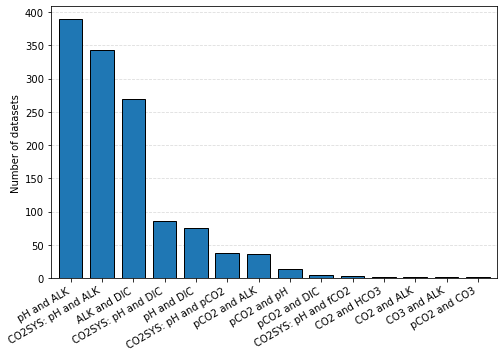

In [164]:
ax = b.plot.bar(
            figsize=[8 ,5],
            width=0.75, rot=40,
            ylabel="Number of datasets",
            linestyle='-', edgecolor="black",
            zorder=3)
ax.grid(axis='y', zorder=0, color='gainsboro', linestyle='--')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

In [199]:
histoSets = {
    'set1': {'name': 'AT', 'values': {4, 8, 11, 13, 15, 23, 24, 26}},
    'set2': {'name': 'CT', 'values': {5, 9, 12, 14, 15, 25, 27}},
    'set3': {'name': 'pHT', 'values': {1, 6, 7, 8, 9, 21}},
    'set4': {'name': 'pH (other scale)', 'values': {26, 27, 28, 29}},
    'set5': {'name': 'pCO2', 'values': {2, 21, 22, 23, 24, 25, 29}}
}
histoSets

{'set1': {'name': 'AT', 'values': {4, 8, 11, 13, 15, 23, 24, 26}},
 'set2': {'name': 'CT', 'values': {5, 9, 12, 14, 15, 25, 27}},
 'set3': {'name': 'pHT', 'values': {1, 6, 7, 8, 9, 21}},
 'set4': {'name': 'pH (other scale)', 'values': {26, 27, 28, 29}},
 'set5': {'name': 'pCO2', 'values': {2, 21, 22, 23, 24, 25, 29}}}

In [194]:
d2[d2['CSC flag'].apply(lambda x: bool(set(x) & set([2,4,13,23])))]

,Pangaea_DOI,CSC flag,len
356,PANGAEA.718130,[13],1
978,PANGAEA.756651,[23],1
1000,PANGAEA.717963,[4],1
1115,PANGAEA.861851,[2.0],1


In [212]:
df = pd.DataFrame()
for s in histoSets.keys():
    print(histoSets[s]['values'])
    df = df.append({'len': len(d2[d2['CSC flag'].apply(lambda x: bool(set(x) & histoSets[s]['values']))])}, 
                   ignore_index=True)
df

{4, 8, 11, 13, 15, 23, 24, 26}
{5, 9, 12, 14, 15, 25, 27}
{1, 6, 7, 8, 9, 21}
{26, 27, 28, 29}
{2, 21, 22, 23, 24, 25, 29}


,len
0,1054.0
1,446.0
2,487.0
3,477.0
4,98.0


In [200]:
h1 = len(d2[d2['CSC flag'].apply(lambda x: bool(set(x) & histoSets['set1']['values']))])

print(h1)

1054


In [44]:
c = pd.DataFrame(b).transpose()
c

,pH and ALK,CO2SYS: pH and ALK,ALK and DIC,CO2SYS: pH and DIC,pH and DIC,pCO2 and ALK,CO2SYS: pH and pCO2,pCO2 and pH,pCO2 and DIC,CO2SYS: pH and fCO2,CO2 and HCO3,CO2 and ALK,CO3 and ALK,pCO2 and CO3
CSC flag,352,325,255,81,75,33,32,13,4,2,1,1,1,1


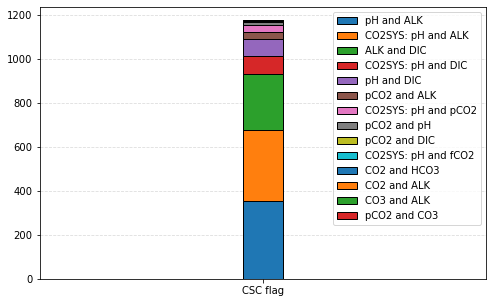

In [45]:
ax = c.plot.bar(
            figsize=[8 ,5],
            width=0.05, rot=0,
            linestyle='-', edgecolor="black",
            zorder=3, stacked=True)
ax.grid(axis='y', zorder=0, color='gainsboro', linestyle='--')